# Brain Stroke Prediction Using Random Forest Classifier

                TABLE OF CONTENTS
                1.Importing Libraries and Loading Data
                2.Data Exploration
                3.Visualization
                4.Data Preprocessing
                5.Model Building 

          IMPORTING LIBRARIES AND LOADING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
#Reading the data
data=pd.read_csv("C:\\Users\\hp\Desktop\\ML Project\\brain_stroke.csv")
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


                     DATA EXPLORATION

In [5]:
#The info() method prints information about the DataFrame. 
#The information contains the number of columns, column labels, column data types, memory usage, 
# range index, and the number of cells in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
Numerical columns info

In [6]:
# If the DataFrame contains numerical data, the description contains
# these information for each column: count - The number of not-empty values.
# mean - The average (mean) value.
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [8]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Categorical columns info

In [7]:
print(data['gender'].unique())
print(data['work_type'].unique())
print(data['Residence_type'].unique())
print(data['smoking_status'].unique())
print(data['ever_married'].unique())

['Male' 'Female']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Yes' 'No']


      EXPLORATORY DATA ANALYSIS


# Total No.Of Patients Gender Wise

In [11]:
gender=data['gender'].value_counts()
gender

Female    2907
Male      2074
Name: gender, dtype: int64

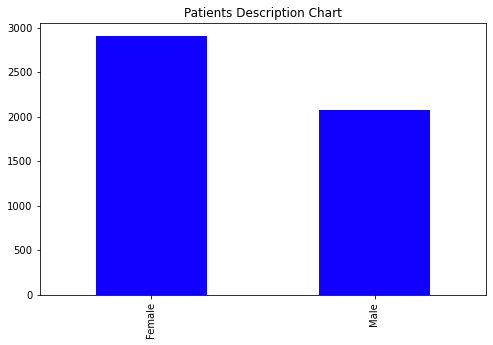

In [15]:
plt.figure(figsize=(8,5))
gender.plot.bar(color="#0F00FF")
plt.title("Patients Description Chart");

Females are the maximum no.of sufferrers from stroke than Males

# Gender wise,differentiating who has hypertension

In [17]:
data.groupby('gender').sum()['hypertension']

gender
Female    264
Male      215
Name: hypertension, dtype: int64

# Residence type ,differentiation who had stroke before

In [18]:
data.groupby('Residence_type').sum()['stroke']

Residence_type
Rural    113
Urban    135
Name: stroke, dtype: int64

# Sorting the stroke data set age wise

In [19]:
data.sort_values("age",ascending=False)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2962,Female,82.00,1,0,No,Private,Rural,61.47,22.9,never smoked,0
3350,Male,82.00,0,0,No,Self-employed,Urban,101.57,24.3,smokes,0
3215,Male,82.00,0,0,Yes,Self-employed,Urban,214.51,24.0,formerly smoked,0
1627,Female,82.00,0,1,Yes,Self-employed,Rural,211.88,28.7,never smoked,0
116,Male,82.00,0,1,Yes,Govt_job,Rural,103.68,25.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
909,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
3148,Male,0.24,0,0,No,children,Urban,89.28,14.2,Unknown,0
3363,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
1487,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


# Patients whose  age is between 20 and 30 suffered from stroke

In [20]:
z=data[(data["age"]>20) | (data['age']<30) & (data['stroke']==1) ]
z.shape

(3995, 11)

3995 patients are between 20 and 30 age group who suffered from brain stroke

# No.of Patients who suffered from stroke based on their smoking status

In [21]:
data['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

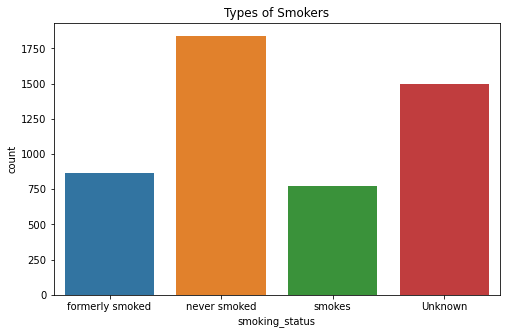

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='smoking_status',data=data);
plt.title("Types of Smokers");

 Guys who never smoked are the primary victims of the brain stroke 
 followed by unknown ,formerly smoked and one who smokes

# Differentiating guys who had stroke based on their marriage status

In [23]:
data['ever_married'].value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

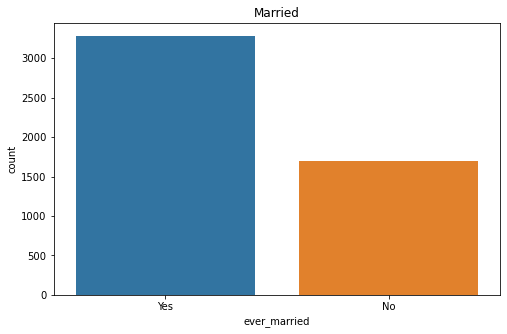

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='ever_married',data=data);
plt.title("Married");

                       DATA PREPROCESSING 

In [27]:
data['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [28]:
# importing label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
data['ever_married']= label_encoder.fit_transform(data['ever_married'])
data['work_type']= label_encoder.fit_transform(data['work_type'])
data['Residence_type']=label_encoder.fit_transform(data['Residence_type'])
data['smoking_status']=label_encoder.fit_transform(data['smoking_status'])
data['gender']=label_encoder.fit_transform(data['gender'])

data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


                  MODEL BUILDING              

In [30]:
X = data["stroke"]
y = data.drop(['stroke'], axis=1)

In [31]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(y, X, test_size=0.30, shuffle=True, random_state=0)

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1430
           1       0.00      0.00      0.00        65

    accuracy                           0.96      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.91      0.96      0.94      1495



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.9475043029259896
0.9565217391304348
